In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [2]:
mba = pd.read_csv('Market Basket Analysis - Groceries_dataset.csv')
mba.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
mba.columns = mba.columns.str.lower()
mba.rename(columns ={'itemdescription':'item_description'}, inplace=True)
mba['date'] = pd.to_datetime(mba['date'], format='%d-%m-%Y')
mba.head()

,member_number,date,item_description
0,1808,2015-07-21,tropical fruit
1,2552,2015-01-05,whole milk
2,2300,2015-09-19,pip fruit
3,1187,2015-12-12,other vegetables
4,3037,2015-02-01,whole milk


In [4]:
df = mba[['member_number', 'item_description']]
df.head()

,member_number,item_description
0,1808,tropical fruit
1,2552,whole milk
2,2300,pip fruit
3,1187,other vegetables
4,3037,whole milk


In [58]:
mba = mba.dropna()
mba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   member_number     38765 non-null  int64         
 1   date              38765 non-null  datetime64[ns]
 2   item_description  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [62]:
mba['member_id'] = (mba['member_number'].astype(str))+ '_' + mba['date'].astype(str)
mba.head()

,member_number,date,item_description,member_id
0,1808,2015-07-21,tropical fruit,1808_2015-07-21
1,2552,2015-01-05,whole milk,2552_2015-01-05
2,2300,2015-09-19,pip fruit,2300_2015-09-19
3,1187,2015-12-12,other vegetables,1187_2015-12-12
4,3037,2015-02-01,whole milk,3037_2015-02-01


In [26]:
items = mba['item_description'].value_counts()
items_head = items.head(10)
items_tail = items.tail(10)

In [35]:
customers = mba['member_number'].value_counts()
top5 = customers.head()

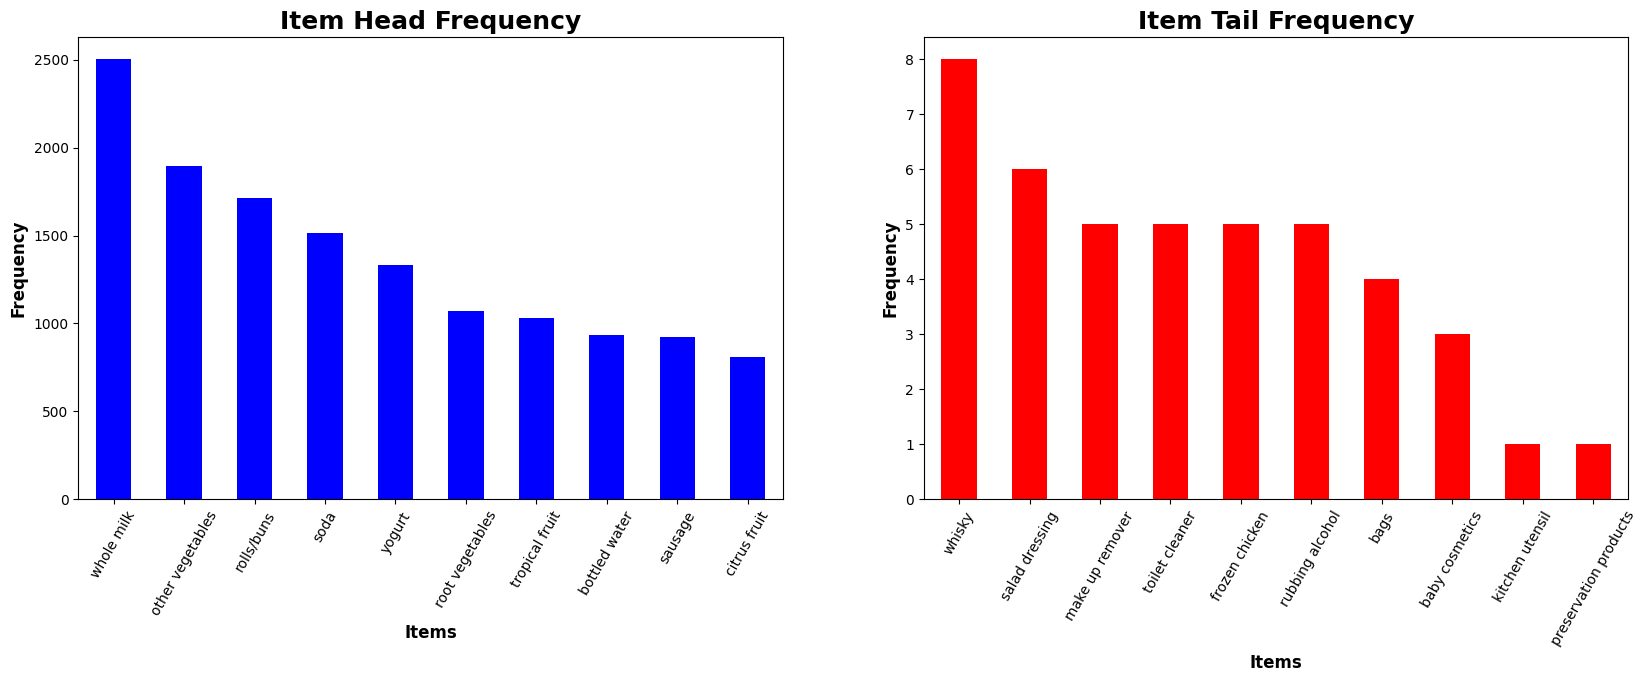

In [33]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
items_head.plot(kind='bar', color='blue')
plt.title('Item Head Frequency', fontsize=18, fontweight='bold')
plt.xticks(rotation=60)
plt.xlabel("Items", fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
items_tail.plot(kind='bar', color='red')
plt.title('Item Tail Frequency', fontsize=18, fontweight='bold')
plt.xticks(rotation=60)
plt.xlabel("Items", fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.show()

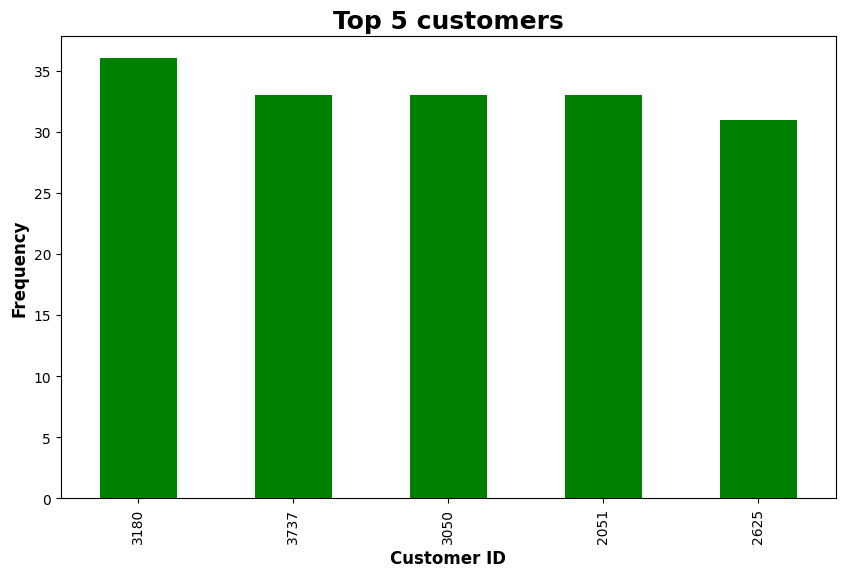

In [37]:
top5.plot(kind='bar', color='green', figsize=(10, 6))
plt.title('Top 5 customers', fontsize=18, fontweight='bold')
plt.xlabel("Customer ID", fontsize=12, fontweight='bold')
plt.ylabel('Frequency', fontsize=12, fontweight='bold')

plt.show()

In [40]:
basket = mba.groupby('member_number')['item_description'].apply(list).reset_index(name='items')

In [41]:
basket.head()

,member_number,items
0,1000,"[soda, canned beer, sausage, sausage, whole mi..."
1,1001,"[frankfurter, frankfurter, beef, sausage, whol..."
2,1002,"[tropical fruit, butter milk, butter, frozen v..."
3,1003,"[sausage, root vegetables, rolls/buns, deterge..."
4,1004,"[other vegetables, pip fruit, root vegetables,..."


In [65]:
basket = pd.crosstab(mba['member_id'], mba['item_description'])
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()

item_description,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
member_id,,,,,,,,,,,,,,,,,,,,,
1000_2014-06-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1000_2015-03-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1000_2015-05-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-07-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000_2015-11-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
itemsets = apriori(basket, min_support=0.005, use_colnames=True)
rules = association_rules(itemsets, metric='lift', min_threshold=1)

C:\Users\u\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [67]:
rules.sort_values(by='zhangs_metric', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
0,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
4,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
5,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587
2,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
3,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702


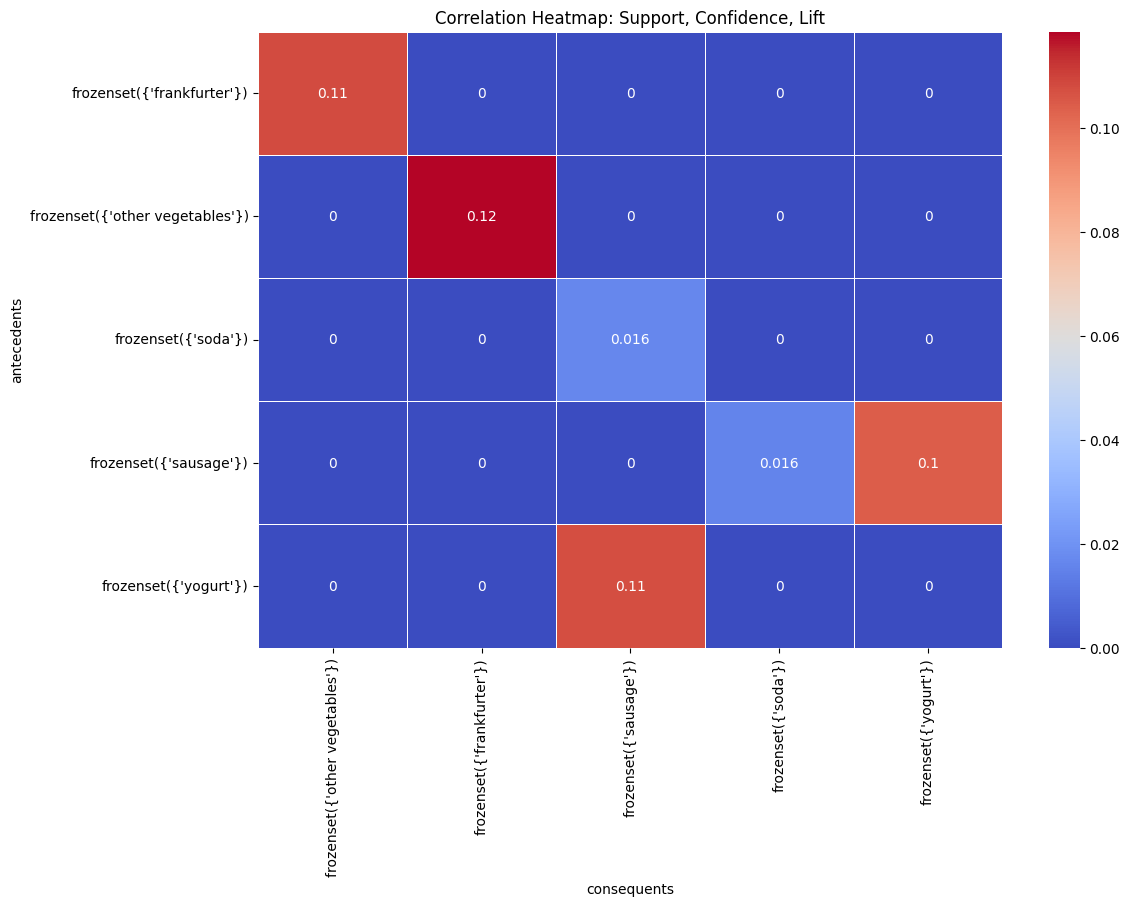

In [75]:
# Heatmap for Support, Confidence, and Lift
plt.figure(figsize=(12, 8))
heatmap_data = rules.pivot(index='antecedents', columns='consequents', values='zhangs_metric').fillna(0)
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap: Support, Confidence, Lift')
plt.show()